In [12]:
experiment=None

In [1]:
#Imports
from comet_ml import Experiment
experiment = Experiment(api_key="YkPEmantOag1R1VOJmXz11hmt", parse_args=False, project_name='SegNet')

COMET INFO: old comet version (1.0.44) detected. current: 1.0.55 please update your comet lib with command: `pip install --no-cache-dir --upgrade comet_ml`
COMET WARNING: Failing to collect the installed os packages
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/yikeqicn/segnet/ace49c4159904d3fbbcf4bb03cdf62f4



In [2]:
from datasets import IRSPRT #RecgArtPrintNoIntsectHVBW
import pytesseract as pyt
from os.path import join, basename, dirname
import tensorflow as tf
import shutil
import os
import sys
import argparse
from glob import glob
import cv2
import numpy as np
import os
import time
from PIL import Image
import editdistance

from torch.utils.data import DataLoader, ConcatDataset, random_split#, SequentialSampler #yike: add SequentialSampler
import torch
import torchvision
import torchvision.transforms as transforms
#from datasets import IRS #ArtPrintNoIntsectLBW,ArtPrintNoIntsectLBW_biameyd_siameyd,ArtPrintNoIntsectLBW_bpr_spr,ArtPrintNoIntsectLBW_biameyd_sprt
from Model_Unet_github import *
from utils import *
import argparse

home = os.environ['HOME']

In [3]:
#General Settings
parser = argparse.ArgumentParser()

# system basics
#parser.add_argument("-name", default='segnet_binary_100epoch_unet_github', type=str, help="name of the log") #debug model_intersect # segnet_no_intersect_1conv_64_channels_30epoch_unet_github
parser.add_argument("-name", default='segnet_unet_lonly_typewriter_57000_200', type=str, help="name of the log") #debug model_intersect # segnet_no_intersect_1conv_64_channels_30epoch_unet_github

parser.add_argument("-gpu", default='-1', type=str, help="gpu numbers")

parser.add_argument("-train", default=False, help="train the NN", action="store_true")

parser.add_argument("-transfer",default=False, help="test the NN", action="store_true")

parser.add_argument("-test",default=True, help="test the NN", action="store_true")

# image and logistic parameters 
parser.add_argument("-image_h", default=32, type=int, help='image height') #('image_h', "360", """ image height """) 32
parser.add_argument("-image_w", default=128, type=int, help='image width')#('image_w', "480", """ image width """)128
#parser.add_argument("-image_h", default=360, type=int, help='image height') 
#parser.add_argument("-image_w", default=480, type=int, help='image width')

parser.add_argument("-image_c", default=1, type=int, help='image channel')#('image_c', "3", """ image channel (RGB) """)
parser.add_argument("-num_class", default=2, type=int, help='total class number')

# training hyperparam
parser.add_argument("-batch_size", default=10, type=int, help='batch_size')
parser.add_argument("-lrInit", default=1e-3, type=int, help='initial lr')
parser.add_argument("-lrDrop1", default=10, type=int, help='step to drop lr by 10 first time') # not sure
parser.add_argument("-lrDrop2", default=1000, type=int, help='step to drop lr by 10 sexond time') # not sure
parser.add_argument('-max_epoch',default=100, type=int,help='max epoch numbers')



# file paths
parser.add_argument('-ckpt_root', default="/root/ckpt", type=str,help= "dir to store ckpt") # log_dir !!!!!
parser.add_argument('-data_root', default="/root/datasets", type=str, help=" root to any data folder ")
parser.add_argument('-urlTranferFrom', default="", type=str, help=" archived model url ")


#args = parser.parse_args()
args = parser.parse_known_args()[0]

name = args.name

experiment.set_name('segnet_unet_recognition_test_irs_sp_typewriter_h_tess_psm7_dilate_erode')
experiment.log_parameters(vars(args))

os.environ['CUDA_VISIBLE_DEVICES'] = args.gpu

ckptroot = args.ckpt_root
args.ckptpath = join(ckptroot, name)
if args.name=='debug': shutil.rmtree(args.ckptpath, ignore_errors=True)
os.makedirs(args.ckptpath, exist_ok=True)


# Dataset

In [4]:
transform_train = transforms.Compose([
    transforms.Lambda(lambda img: cv2.resize(img, (args.image_w,args.image_h), interpolation=cv2.INTER_CUBIC)),
    transforms.Lambda(lambda img: np.expand_dims(img,3) ),
    #transforms.Lambda(lambda img: add_artifacts(img,args)),
    #transforms.Lambda(lambda img: cv2.transpose(img))
    ])
#testset=RecgArtPrintNoIntsectHVBW(transform=transform_train)
testset=IRSPRT(transform=transform_train)
testloader = DataLoader(testset, batch_size=args.batch_size, shuffle=False, drop_last=False,num_workers=2)

In [5]:
len(testset)

22165

# Testing

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


0.0


COMET ERROR: File could not be uploaded


0.004511617414843221


COMET ERROR: File could not be uploaded
COMET ERROR: File could not be uploaded
COMET ERROR: File could not be uploaded


0.009023234829686443
0.013534852244529664
0.018046469659372885
0.022558087074216106
0.027069704489059328
0.03158132190390255
0.03609293931874577
0.040604556733588995
0.04511617414843221
0.04962779156327544
0.054139408978118655
0.05865102639296188
0.0631626438078051
0.06767426122264832
0.07218587863749154
0.07669749605233477
0.08120911346717799
0.0857207308820212
0.09023234829686443
0.09474396571170765
0.09925558312655088
VALID: Character error rate: 30.987479%. Word accuracy: 21.127904%.
VALID: Cleaned Character error rate: 21.906825%. Cleaned Word accuracy: 23.834875%.


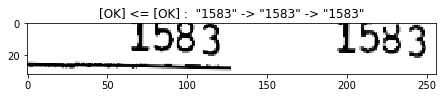

In [7]:
  upload=True
  numCharErr, numCharTotal, numWordOK, numWordTotal = 0, 0, 0, 0
  numCharErrClean, numWordOKClean = 0, 0
  #plt.figure(figsize=(6,2))
  counter = 0
  '''
  yike: convert to troch dataloader, test
  '''
  lenidx=len(testset)
  kernel = np.ones((2,2), np.uint8) 
  for idx, (images, labels) in enumerate(testloader):
    
    if np.mod(idx,100)==0:
      print(str(idx/lenidx))
    images=images.numpy()
    cleaned_list=model.imageClean2(images)
    #print(images[0].shape)
    #print(cleaned_list[0].shape)
    for img,img_cl,label in zip(images,cleaned_list,labels):
        img=np.squeeze(img)
        img_cl= np.squeeze(img_cl).astype(np.dtype('uint8'))
        img_cl=cv2.dilate(img_cl, kernel, iterations=1)
        img_cl=cv2.erode(img_cl, kernel, iterations=1)
        img_pil=Image.fromarray(img)
        img_cl_pil=Image.fromarray(img_cl)
        rec=pyt.image_to_string(img_pil,config='-psm 7')
        rec_cl=pyt.image_to_string(img_cl_pil,config='-psm 7')
        
        
        numWordOK += 1 if label == rec else 0 #batch.gtTexts[i]
        numWordTotal += 1
        dist0 = editdistance.eval(rec, label)# batch.gtTexts[i])
        numCharErr += dist0
        numCharTotal += len(labels)
        
        numWordOKClean += 1 if label == rec_cl else 0 #batch.gtTexts[i]
        #numWordTotal += 1
        dist1 = editdistance.eval(rec_cl, label)# batch.gtTexts[i])
        numCharErrClean+= dist1
        #numCharTotal += len(labels)
        
        if upload and counter<2000: # log images
            im_save=np.concatenate((img,img_cl),axis=1)
            text = ' '.join(['[OK]' if dist1 == 0 else '[ERR:%d]' % dist1,'<=','[OK]' if dist0 == 0 else '[ERR:%d]' % dist0,': ' ,'"' + label + '"', '->', '"' + rec + '"', '->', '"' + rec_cl + '"'])
            log_image2(experiment, im_save, text, 'test_remove_artifacts', args.ckptpath, counter)
        
        
        counter+=1
    #if counter>20000: break # optional

  charErrorRate = numCharErr / numCharTotal
  wordAccuracy = numWordOK / numWordTotal
  charErrorRateClean = numCharErrClean / numCharTotal
  wordAccuracyClean = numWordOKClean / numWordTotal
  print('VALID: Character error rate: %f%%. Word accuracy: %f%%.' % (charErrorRate * 100.0, wordAccuracy * 100.0))
  print('VALID: Cleaned Character error rate: %f%%. Cleaned Word accuracy: %f%%.' % (charErrorRateClean * 100.0, wordAccuracyClean * 100.0))
  experiment.log_metric('valid/raw/cer', charErrorRate)#, step)
  experiment.log_metric('valid/raw/wer', 1-wordAccuracy)#, step)
  experiment.log_metric('valid/clean/cer', charErrorRateClean)#, step)
  experiment.log_metric('valid/clean/wer', 1-wordAccuracyClean)#, step)

        
        #print(counter)
        #print(label)
        #print(rec)
        #print(rec_cl)
        #print(' ')
    #break
    


# Model Initiate

In [6]:
model=Model(args, experiment, loss_weight=[0.5,0.5], mustRestore=False)

Instructions for updating:
Colocations handled automatically by placer.
GGG
[None, 32, 128, 1]
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


0 conv1: (?, ?, ?, 32)
0 conv2: (?, ?, ?, 32)
1 conv1: (?, ?, ?, 64)
1 conv2: (?, ?, ?, 64)
2 conv1: (?, ?, ?, 128)
2 conv2: (?, ?, ?, 128)
1 h_deconv: (?, ?, ?, 64)
1 h_deconv_concat: (?, ?, ?, ?)
1 h_conv1_post_deconv: (?, ?, ?, 64)
1 h_conv2_post_deconv: (?, ?, ?, 64)
0 h_deconv: (?, ?, ?, 32)
0 h_deconv_concat: (?, ?, ?, ?)
0 h_conv1_post_deconv: (?, ?, ?, 32)
0 h_conv2_post_deconv: (?, ?, ?, 32)
0 outmap: (?, ?, ?, 2)
(?, ?, ?, 2)
loss: ()
INFO:tensorflow:Summary name loss/cross_entropy (raw) is illegal; using loss/cross_entropy__raw_ instead.


INFO:tensorflow:Summary name loss/cross_entropy (raw) is illegal; using loss/cross_entropy__raw_ instead.


INFO:tensorflow:Summary name loss/total_loss (raw) is illegal; using loss/total_loss__raw_ instead.


INFO:tensorflow:Summary name loss/total_loss (raw) is illegal; using loss/total_loss__raw_ instead.
COMET ERROR: Failed to extract parameters from Estimator.init()


toto_loss_shape: Tensor("loss/total_loss:0", shape=(), dtype=float32)
Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


Python: 3.5.2 (default, Nov 12 2018, 13:43:14) 
[GCC 5.4.0 20160609]
Tensorflow: 1.12.0-rc0
Instructions for updating:
Use standard file APIs to check for files with this prefix.


Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from /root/ckpt/segnet_unet_lonly_typewriter_57000_200/model-200


INFO:tensorflow:Restoring parameters from /root/ckpt/segnet_unet_lonly_typewriter_57000_200/model-200


Init with stored values from /root/ckpt/segnet_unet_lonly_typewriter_57000_200/model-200


In [9]:
s='1_.png'

In [11]:
s[s.find('_')+1:-4]

''